In [11]:
import os
import copy
import json
import random
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

cmap = colors.ListedColormap(
    ['#FFFFFF', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)


    
def plot_one(matrix, ax, title):
    """Plots a single grid from the ARC task"""
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='black', linewidth=0.5)
    
    ax.set_xticks([x-0.5 for x in range(1 + len(matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_title(title)


def create_hollow_rectangle(min_size=5):
    n = random.randint(min_size+1, 15)
    m = random.randint(min_size+1, 15)
    grid = np.zeros((n, m), dtype=int)
    rect_height = random.randint(min_size, n-1)
    rect_width = random.randint(min_size, m-1)
    start_row = (n - rect_height) // 2
    start_col = (m - rect_width) // 2
    for i in range(start_row, start_row + rect_height):
        for j in range(start_col, start_col + rect_width):
            if (i == start_row or i == start_row + rect_height - 1 or 
                j == start_col or j == start_col + rect_width - 1):
                grid[i][j] = 1
    return grid.tolist()

def find_rectangle(grid):
    rows = len(grid)
    cols = len(grid[0])
    top = left = float('inf')
    bottom = right = -1
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1:
                top = min(top, i)
                bottom = max(bottom, i)
                left = min(left, j)
                right = max(right, j)
    return top, bottom, left, right

def create_concentric_patterns(grid):
    result = [row[:] for row in grid]
    top, bottom, left, right = find_rectangle(grid)
    current_top = top + 2
    current_bottom = bottom - 2
    current_left = left + 2
    current_right = right - 2
    layer = 1
    while current_top <= current_bottom and current_left <= current_right:
        if layer % 2 == 1:
            for j in range(current_left, current_right + 1):
                result[current_top][j] = 2
                result[current_bottom][j] = 2
            for i in range(current_top, current_bottom + 1):
                result[i][current_left] = 2
                result[i][current_right] = 2
        current_top += 1
        current_bottom -= 1
        current_left += 1
        current_right -= 1
        layer += 1
    return result

# Stars
def create_star_grid(min_size = 5):
    grid_size = (random.randint(min_size, 15), random.randint(min_size, 15))
    num_stars = random.randint(5, 10)
    
    grid = np.zeros(grid_size, dtype=int)

    # Offsets for the star pattern (center, up, down, left, right)
    star_offsets = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    placed_stars = 0
    max_attempts = 1000  # Prevent infinite loops
    attempts = 0

    while placed_stars < num_stars and attempts < max_attempts:
        attempts += 1

        # Random center position avoiding edges to fit the star
        x = np.random.randint(1, grid_size[0] - 1)
        y = np.random.randint(1, grid_size[1] - 1)

        # Check surrounding cells to ensure no adjacent stars
        can_place = True
        for dx in range(-2, 3):
            for dy in range(-2, 3):
                nx, ny = x + dx, y + dy
                if 0 <= nx < grid_size[0] and 0 <= ny < grid_size[1]:
                    if grid[nx, ny] == 1:
                        can_place = False
                        break
            if not can_place:
                break

        if can_place:
            # Place the star on the grid
            for dx, dy in star_offsets:
                nx, ny = x + dx, y + dy
                grid[nx, ny] = 1
            placed_stars += 1

    return grid.tolist()

def connect_stars_with_lines(grid):
    grid = copy.deepcopy(grid)  # Create a copy to avoid modifying the original grid

    rows, cols = len(grid), len(grid[0])

    def is_star(x, y):
        if grid[x][y] != 0:
            return False
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if not (0 <= nx < rows and 0 <= ny < cols) or grid[nx][ny] != 1:
                return False
        return True

    stars = []
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if is_star(i, j):
                stars.append((i, j))

    # Draw horizontal lines between stars
    stars.sort(key=lambda x: x[0])

    for idx, (x1, y1) in enumerate(stars):
        for (x2, y2) in stars[idx + 1:]:
            if x1 == x2:
                y_start, y_end = min(y1, y2) + 1, max(y1, y2) - 1
                path = [grid[x1][y] for y in range(y_start + 1, y_end)]
                if all(cell == 0 for cell in path):
                    for y in range(y_start + 1, y_end):
                        grid[x1][y] = 2

    # Draw vertical lines between stars
    for idx, (x1, y1) in enumerate(stars):
        for (x2, y2) in stars[idx + 1:]:
            if y1 == y2:
                x_start, x_end = min(x1, x2) + 1, max(x1, x2) - 1
                path = [grid[x][y1] for x in range(x_start + 1, x_end)]
                if all(cell == 0 for cell in path):
                    for x in range(x_start + 1, x_end):
                        grid[x][y1] = 2
    return grid

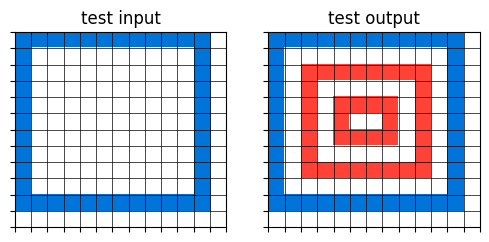

In [4]:
grid = create_hollow_rectangle(min_size=10)
result = create_concentric_patterns(grid)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_one(grid, axs[0], 'test input')
plot_one(result, axs[1], 'test output')

Reached maximum attempts without placing all stars.


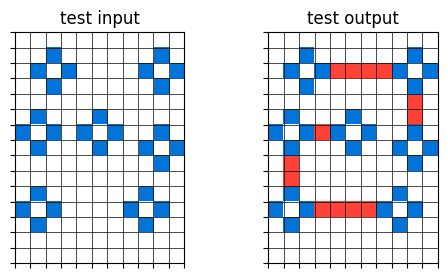

In [6]:
grid = create_star_grid(min_size=10)
connected_grid = connect_stars_with_lines(grid)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
plot_one(grid, axs[0], 'test input')
plot_one(connected_grid, axs[1], 'test output')

In [12]:
tasks = []
os.makedirs('tasks', exist_ok=True)

for task_id in range(1000):
    task = {'id': task_id, 'train': [], 'test': []}
    for i in range(4):
        grid = create_star_grid(min_size=10)
        result = connect_stars_with_lines(grid)
        if i == 0:
            task['test'].append({'input': grid, 'output': result})
        else:
            task['train'].append({'input': grid, 'output': result})
    tasks.append(task)

    if task_id % 100 == 0:
        print(f'{task_id} tasks generated')

with open('tasks/star_tasks.json', 'w') as f:
    json.dump(tasks, f, indent=4)


0 tasks generated
100 tasks generated
200 tasks generated


In [ ]:
tasks = []
os.makedirs('tasks', exist_ok=True)

for task_id in range(1000):
    task = {'id': task_id, 'train': [], 'test': []}
    for i in range(4):
        grid = create_hollow_rectangle(min_size=10)
        result = create_concentric_patterns(grid)
        if i == 0:
            task['test'].append({'input': grid, 'output': result})
        else:
            task['train'].append({'input': grid, 'output': result})
    tasks.append(task)

    if task_id % 100 == 0:
        print(f'{task_id} tasks generated')

with open('tasks/star_tasks.json', 'w') as f:
    json.dump(tasks, f, indent=4)
